<a href="https://colab.research.google.com/github/syh0397/Statistics_python/blob/main/6_Anova_test_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin
!pip install --upgrade pingouin

      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## ANOVA

#### **Anova란 ?**

- **Analysis of variance** = 분산분석 !
    - 두개 이상의 평균을 비교할때 사용한다. 
    - 두개라고 했지만 두개에는 잘 안쓰고 세개에 주로 사용한다.

***그럼 T - test를 두번 하면 되는거 아닌가 ?*** 

- 물론 가능하다 
- 하지만, P-value (그런데 그일이 실제로 일어났습니다!)의 범위가 중복으로 두번이나 추가된다
- 1종오류를 범할 확률이 처음에는 0.04라서 귀무가설을 기각하더라도 
- 한번 더하게 되면 0.08이 되어서 귀무가설을 기각하지 못하는 꼴이 된다.
- 그렇기 때문에 아노바 테스트를 사용한다!


Familywise Error Rate: 여러 개의 가설 검정을 할 때 적어도 하나의 가설에서 1종 오류가 발생할 가능성

가설검정을 많이 할 수록 FWER은 증가

유의수준 5%에서 가설 검정을 1번 할 때, 1종 오류가 발생하지 않을 확률은 95%. `FWER = 100% - 95% = 5%`

가설검정을 2번했을 때, 2번 모두 1종 오류가 발생하지 않을 확률은 
```
95% × 95% = 90.25%. FWER = 9.75%

```



가설검정을 3번했을 때, 3번 모두 1종 오류가 발생하지 않을 확률은 


```
95% 
×
 95% 
×
 95% = 85.74%. FWER = 14.26%
```



#### 그럼 왜 분산 분석이라고 해놓고 평균을 사용하는가 ? 

- 일단 Anova test 의 공식은 아래와 같다

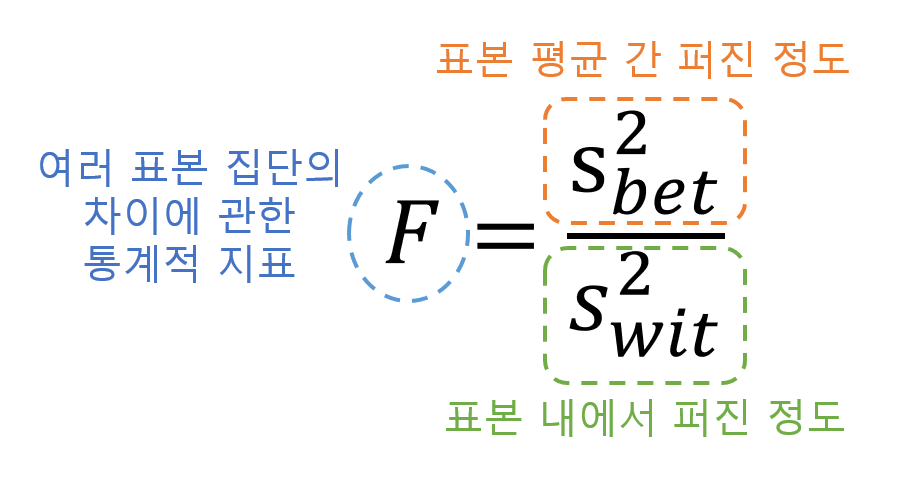

- F값을 구하는데 (F = 표본 평균 간 변동/표본 내 변동) , F 명칭이 중요한건 아니고, 표본 내에서 퍼진 정도 분의 표본 평균간 퍼진 정도이다 
- 이게 무슨말이냐면, 표본 평균간 퍼진 정도가 표본내에서 퍼진 정도보다 유의미하게 크다면 ? 차이가 있다고 볼수 있다는 말이다. 
---

- 표본내에서 퍼진정도 => 이걸 집단이라고 유의미 하게 볼 수 있는가?
- 표본 평균간 퍼진정도 => 집단끼리 얼마나 다르냐 ? 

---

- 그럼 왜 평균을 쓰느냐 
    - 분산이 0 이라면 => 데이터가 하나만 있다면 ? (데이터가 퍼진 정도가 없다면)=> 평균이 하나인데 분산도 없다 ? 
    - 평균을 통해서 데이터가 얼마나 퍼져있는지 볼 수 있기 때문이다. 

---

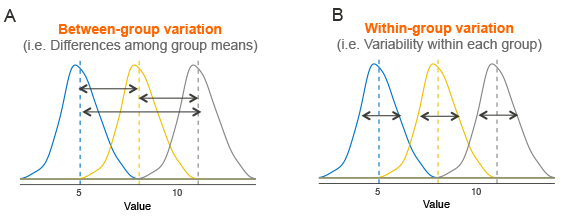

1. 근데 평균이 늘 아래 그림처럼 정규분포는 아니지 않나 ? => 그럼 평균으로부터 데이터가 얼마나 퍼졌는지 알 수 있나?
2. 그래서 정규성을 띄는지 먼저 테스트 해보아야 한다. 
3. 그것을 '정규성 검증' 이라고 하고 검정전 사전 test라고 생각하면 된다.
4. t-test또한 정규성이 확보되어야 한다. 
5. 데이터의 분포는 표본수 n이 30이 넘어가게 되면 대부분 정규성을 따르는데 꼭 그렇지만은 않으니 정규성을 확인해볼것 ! 

#### **분산분석  검정의 가정사항 (assumptions of ANOVA test)**

    (1) 독립성: 각 샘플 데이터는 서로 독립이다.

    (2) 정규성: 각 샘플 데이터는 정규분포를 따르는 모집단으로 부터 추출되었다. 

    (3) 등분산성: 그룹들의 모집단의 분산은 모두 동일하다. 


#### **정규성 검정 종류**



**1. Shaprio-Wilks test**


- 샤피로 테스트
- 표본수(n)가 2000 미만인 데이터셋에 적합한 정규성 검정
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

**2. Kolmogorove-Smirnov test**


- 콜모고로프 스미르노프 검정
- 데이터의 **누적분포함수**와 **비교하고자 하는 분포의 누적분포함수 간의 최대 거리**를 통계량으로 사용하는 가설검정 방법
- 서로 같은 분포로부터 나왔는지 보는
- 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법
- 표본수(n)가 2000 초과인 데이터셋에 적합한 정규성 검정
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

**3. Quantile-Quantile plot (Graphic test)**

- Q는 분위수(Quantile)의 약어
- 비교하고자 하는 분포의 분위수끼리 좌표평면에 표시하여 그린 그림
- 데이터셋이 정규분포를 따르는지 시각적으로 판단하는 분석 방법
- 데이터 종류가 적다면, QQplot을 통해 시각적으로 가장 간단하며 직관적이다.
- https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

**일원분산분석의 H0, H1**

- 귀무가설(H0): 모든 집단의 평균이 동일하다
- 대립가설(H1): 적어도 한 집단의 평균이 다른 집단들과 다르다

**정규성 검정의 H0, H1**

- 귀무가설(H0) : 데이터셋이 정규분포를 따른다.
- 대립가설(H1) : 데이터셋이 정규분포를 따르지 않는다.

- 귀무가설을 기각하고 대립가설이 채택된다면 (p<0.01 or 0.05) 해당 데이터셋은 정규분포를 따르지 않는 것이다.

#### **One Way Anova test** & 등분산성과 정규성 검정 같이 해보기

- by using seaborn taxis data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np 

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import sklearn 
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import scipy 
from scipy import  stats
import statsmodels.api as sm
import pylab as py

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATA/df_sessioned.csv')
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,...,diff,check_,coh,new_session,New_sessoion,start_day,start_week,start_month,New_sessoion.1,Session
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,...,0 days 00:01:17,False,150.0,New,new,2020-09-24,2020-09-23,2020-09-01,True,14722
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,...,0 days 00:17:45,False,1392.0,New,new,2020-09-24,2020-09-23,2020-09-01,True,14697
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,...,3 days 01:03:40,New,13454.0,New,new,2020-09-24,2020-09-23,2020-09-01,True,10665
3,3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,...,2 days 03:21:40,New,516.0,New,new,2020-09-24,2020-09-23,2020-09-01,True,14341
4,4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,...,11 days 22:16:15,New,6274.0,New,new,2020-09-24,2020-09-23,2020-09-01,True,9870


In [5]:
df.columns

Index(['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'date',
       'time', 'main_category', 'mdi_category', 'sub_category', 'date_',
       'diff', 'check_', 'coh', 'new_session', 'New_sessoion', 'start_day',
       'start_week', 'start_month', 'New_sessoion.1', 'Session'],
      dtype='object')

In [6]:
x1 = df.price.sample(n=200, random_state = 424)
x2 = df.price.sample(n=200, random_state = 111)
x3 = df.price.sample(n=200, random_state = 6666)

In [7]:
# 등분산 검정
print(stats.bartlett(x1,x2,x3),
      stats.fligner(x1, x2, x3) ,
      stats.levene(x1, x2, x3), sep="\n")

BartlettResult(statistic=41.38447604305276, pvalue=1.031514195488102e-09)
FlignerResult(statistic=0.5341116682822381, pvalue=0.7656303219605027)
LeveneResult(statistic=0.9538356438704861, pvalue=0.3858467822876003)


- 등분산 검정은 **Bartlett 검정**으로 진행했을때 P value가 0.05 미만이여서 **귀무가설 기각 -> 등분산이 아님** 
- 나머지는 등분산이라고 했으므로 **등분산인 경우와 아닌경우 모두 살펴본다**. 

#### Kolmogorove-Smirnov test

In [8]:
# 정규성 검정
print(stats.ks_2samp(x1, x2), 
      stats.ks_2samp(x1, x3), 
      stats.ks_2samp(x3, x2),  sep="\n")

KstestResult(statistic=0.07, pvalue=0.7125821300149116)
KstestResult(statistic=0.055, pvalue=0.9238374197330625)
KstestResult(statistic=0.095, pvalue=0.32811544409418575)


- 콜모고로프-스미르노프 검정 : 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법
- 모두 P value가 0.05를 넘으므로 **귀무가설 기각실패 -> 정규성을 만족한다.**


In [9]:
print("x1 : ", stats.shapiro(x1),"x2 : ",stats.shapiro(x2),"x3 : ",stats.shapiro(x3),sep="\n")

x1 : 
ShapiroResult(statistic=0.6035934686660767, pvalue=3.081034726206746e-21)
x2 : 
ShapiroResult(statistic=0.6812300682067871, pvalue=3.1767067508941203e-19)
x3 : 
ShapiroResult(statistic=0.7777526378631592, pvalue=3.947802985563968e-16)


<Figure size 576x396 with 0 Axes>

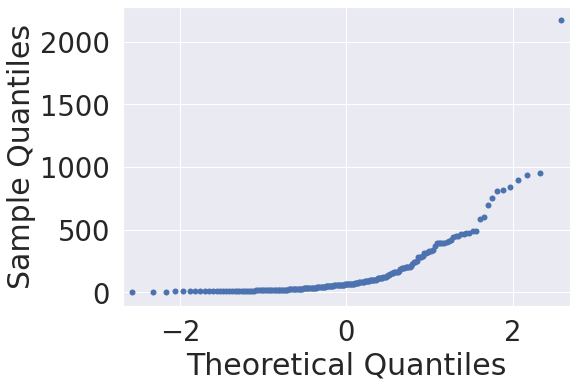

In [10]:
fig = plt.figure()
sm.qqplot(x1)
py.show()

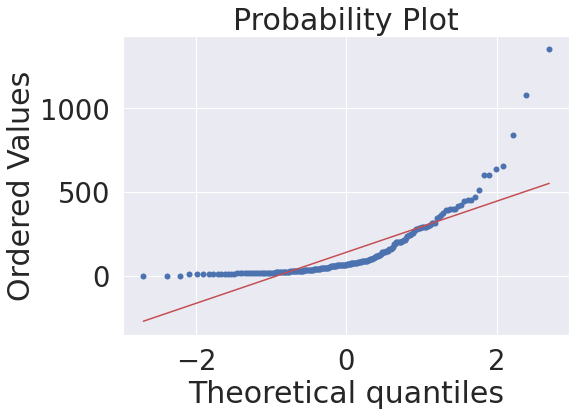

In [11]:
from scipy.stats import probplot
plt.figure()
probplot(x2, plot = plt)
plt.show()

In [12]:
# def Normality_taxis(x):
#   df = pd.read_csv('/content/drive/MyDrive/data/e-Coupon/df.csv')
#   Key = df[x]
#   print(stats.shapiro(Key))
#   plt.figure()
#   probplot(Key, plot = plt)
#   return plt.show()



---



#### **one way anova**


cohort 별로 이벤트한 가격(price)은 차이가 있을것인가? : 가설


In [13]:
dt = df.loc[:,['coh','price']]
dt.groupby("coh").sum()

,price
coh,
0.0,76980306.77
1.0,439662.94
2.0,379123.13
3.0,379828.05
4.0,392205.04
...,...
404270.0,16.98
457319.0,10.92
561967.0,100.05


- 데이터를 랜덤하게 분할해준다 

In [28]:
dt_group1 = dt.sample(frac = 0.5, random_state = 1)
dt_group2 = dt.drop(dt_group1.index)
dt_group2 = dt.sample(frac = 0.5, random_state = 2)
dt_group3 = dt.drop(dt_group2.index)
print(len(dt_group1),len(dt_group2),len(dt_group3))

442564 442564 442565


In [30]:
dt_group1

,coh,price
793654,0.0,88.24
230478,0.0,415.54
376830,0.0,126.68
50194,0.0,136.02
393590,0.0,123.27
...,...,...
821435,0.0,16.51
479493,0.0,205.25
836735,0.0,415.54
714061,38.0,62.84


In [32]:
group1= dt_group1['price']
group2= dt_group2['price']
group3= dt_group3['price']

In [33]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)
print(F_statistic, pVal)

1.0901346083984145 0.3361715406239764


- 유의수준 이상이므로 귀무가설 기각실패
- 유의미한 차이가 없다

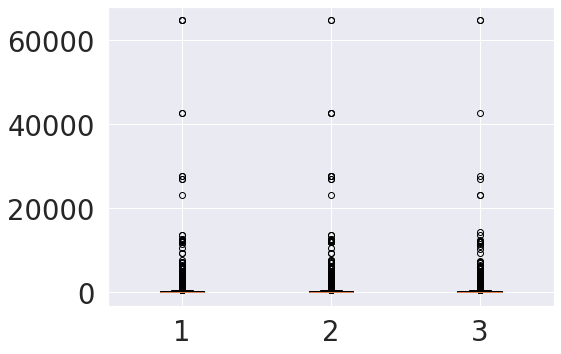

In [34]:
plot_sp= [group1,group2, group3]

ax = plt.boxplot(plot_sp)
plt.show()

In [36]:
# 정규성 가정되지 않을때  Kruskal-Waliis test
stats.kruskal(group1,group2,group3)

KruskalResult(statistic=1.4604627607884382, pvalue=0.48179749869705635)

- 정규성 가정되지 않을때 0.05 초과이므로 귀무가설 채택
- 유의미한 차이가 없다.

In [38]:
#등분산성 가정되지 않을때 Welch’s ANOVA
import pingouin as pg

#perform Welch's ANOVA
pg.welch_anova(dv='price', between='coh', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,coh,9729,19350.135095,0.0,1.0,0.008954


사후분석을 진행하여 그룹간 평균의 차이를 더욱 자세히 살펴봅니다. 

사후분석(post hoc)

*   ANOVA 검증 결과 유의미하다는 결론을 얻었을 때, 구체적으로 어떤 수준(들)에서 평균 차이가 나는지를 검증하는 방법
*   연구자의 사전 가설(아이디어)없이 ANOVA를 시행한 경우, 탐색적으로 평균 차이가 나는 수준(집단)을 살펴보기 위해 시행하는 방법
- 조합 가능한 모든 쌍에 대해 비교를 하므로 과잉검증으로 인한 FWER 증가






- 유의수준을 보정하여 FWER을 0.05로 고정시킴

피셔의 LSD

봉페로니 교정

투키의 HSD
  - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
  - FWER이 중간 정도

셰페의 방법

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(dt['price'], dt['coh'], alpha=0.05)
print(posthoc)

레퍼런스 https://mindscale.kr/course/basic-stat-python/22/